# HR Analytics: Job Change of Data Scientist

Attrition prediction model
> Author: **Chloe Jung** <br>
> Date: 2/4/2021

##### This Notebook contains interactive plots using plotly. You can see the whole visualizations in: 

## Part 1: Exploratory Data Analysis

## Table of Contents

The data was obtained from [Kaggle]().

* [1. Import the Packages](#ImportPackages)
* [2. Objectives](#Objectives)
* [3. Load the Data](#LoadData)
* [4. Explore the Data](#ExploreData)
    * [4-1. target ](#4-1)
    * [4-2. enrolled_id](#4-2)
    * [4-3. city](#4-3)
    * [4-4. city_development_index](#4-4)
    * [4-5. gender](#4-5)
    * [4-6. relevent_experience](#4-6)
    * [4-7. enrolled_univeristy](#4-7)
    * [4-8. education_level](#4-8)
    * [4-9. major_discipline](#4-9)
    * [4-10. experience](#4-10)
    * [4-11. company_size](#4-11)
    * [4-12. company_type](#4-12)
    * [4-13. last_new_job](#4-13)
    * [4-14. training_hours](#4-14)
* [5. Correlation](#Correlation)
* [6. Export the Data](#ExportData)

## 1. Import Packages <a class="anchor" id="ImportPackages"></a>

In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

from pylab import rcParams
import plotly
from plotly import tools
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px
import chart_studio.plotly as py
chart_studio.tools.set_credentials_file(username='chloesjung', api_key='f7dQUxIWESZ6uUcsk7Dz')

from wordcloud import WordCloud
import matplotlib.dates as mdates
from matplotlib import gridspec




#from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, log_loss, plot_roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

## 2. Objectives <a class="anchor" id="Objectives"></a>

- Develop a machine learning model to predict whether an data scientist is looking for a new job

## 3. Load the Data <a class="anchor" id="LoadData"></a>

In [2]:
# load the train data
train = pd.read_csv('aug_train.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
train.shape

(19158, 14)

In [4]:
# load the test data
test = pd.read_csv('aug_test.csv')
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [5]:
test.shape

(2129, 13)

In [6]:
# For EDA, concatenate the train and test data
df = pd.concat([train,test], axis=0)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## 4. Explore the Data <a class="anchor" id="ExploreData"></a>

In [7]:
# before exploring the data, set the color palette for the graphs

def generateDiscreteColourScale(colour_set):
    #colour set is a list of lists
    colour_output = []
    num_colours = len(colour_set)
    divisions = 1./num_colours
    c_index = 0.
    # Loop over the colour set
    for cset in colour_set:
        num_subs = len(cset)
        sub_divisions = divisions/num_subs
        # Loop over the sub colours in this set
        for subcset in cset:
            colour_output.append((c_index,subcset))
            colour_output.append((c_index + sub_divisions-
                .001,subcset))
            c_index = c_index + sub_divisions
    colour_output[-1]=(1,colour_output[-1][1])
    return colour_output

In [8]:
color_schemes = [
    ['#890000','#890000','#5c0000'],
    ['#2a6b28','#0b4c07','#003206'],
    ['#4f5a90','#374798','#30375a'],
    ['#fff4b1','#ffed86','#ffdb00']
]

In [9]:
colorscale = generateDiscreteColourScale(color_schemes)

#### Features (information provided from the data source)
- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 0 to 2128
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
mem

In [11]:
# Missing Values for Train
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing = missing.sort_values(by='count', ascending=False)
missing

,count,%
company_type,6774,31.822239
company_size,6560,30.816931
gender,5016,23.563677
major_discipline,3125,14.680321
target,2129,10.001409
education_level,512,2.405224
last_new_job,463,2.175036
enrolled_university,417,1.958942
experience,70,0.328839
enrollee_id,0,0.000000


In [47]:
trace = go.Bar(
        y=missing.index[::-1],
        x=missing['%'][::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(color='#4169E1',))
data = [trace]
layout = dict(title = 'Percentage Missing Values',
              margin  = dict(l = 200))
fig = go.Figure(data=data, layout=layout)
import plotly.io as pio
pio.show(fig)
#py.iplot(fig, filename='PAM-missing',auto_open=True)


In [40]:
def url_to_iframe(url, text=True):
    html = ''
    # style
    html += '''<head>
    <style>
    div.textbox {
        margin: 30px;
        font-weight: bold;
    }
    </style>
    </head>'
    '''
    # iframe
    html += '<iframe src=' + url + '.embed#{} width=750 height=400 frameBorder="0"></iframe>'
    if text:
        html += '''<body>
        <div class="textbox">
            <p>Click on the presentation above and use left/right arrow keys to flip through the slides.</p>
        </div>
        </body>
        '''
    return html

### 4-1. Target Variable: target<a class="anchor" id="4-1"></a>

Target
- 0 – Not looking for job change
- 1 – Looking for a job change

In [13]:
df['target'].describe()

count    19158.000000
mean         0.249348
std          0.432647
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

In [14]:
target0 = df.loc[df['target']==0]
target1 = df.loc[df['target']==1]

In [15]:
print("Number of Missing Values: ", df['target'].isna().sum())

Number of Missing Values:  2129


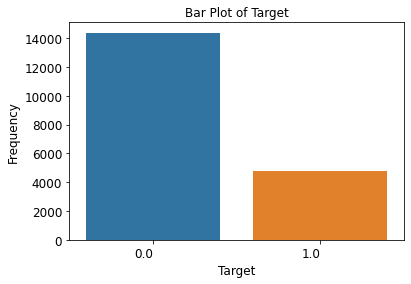

In [16]:
gtarget = sns.countplot(x="target",data=df);
plt.title('Bar Plot of Target',size = 12);
gtarget.set_xticklabels(gtarget.get_xticklabels(), ha="right");
plt.xlabel('Target',size=12)
plt.ylabel('Frequency',size=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('4-1Target.png',bbox_inches = 'tight')

In [17]:
tarcount = df['target'].value_counts()
trace1 = go.Pie(labels=list(tarcount.index), values=list(tarcount.values))
layout = dict(title="Employees who are looking for job change")
fig = dict(data=[trace1], layout=layout)
iplot(fig, filename="pie Plot")

### 4-2. enrollee_id <a class="anchor" id="4-2"></a>

enrollee_id
- Unique ID for candidate 
- This variable will be dropped when building a predictive machine learning model as this would not provide any meaningful influence

In [18]:
df['enrollee_id'].describe()

count    21287.000000
mean     16873.983652
std       9612.131237
min          1.000000
25%       8554.500000
50%      16967.000000
75%      25161.500000
max      33380.000000
Name: enrollee_id, dtype: float64

In [19]:
print("Number of Missing Values: ", df['enrollee_id'].isna().sum())

Number of Missing Values:  0


In [20]:
# Check if enrollee_id is unique for each person
print('Number of unique enrollee_ids is:' + str(len(df['enrollee_id'].unique())))

Number of unique enrollee_ids is:21287


### 4-3. city <a class="anchor" id="4-3"></a>

city
- City code
- Categorical variable

In [21]:
df['city'].describe()

count        21287
unique         123
top       city_103
freq          4828
Name: city, dtype: object

In [22]:
print("Number of Missing Values: ", df['city'].isna().sum())

Number of Missing Values:  0


In [23]:
# top 10 cities
top10 = df['city'].value_counts()[0:9]
top10

city_103    4828
city_21     3020
city_16     1701
city_114    1491
city_160     958
city_136     646
city_67      470
city_75      335
city_102     334
Name: city, dtype: int64

In [24]:
# Bar graoh of top 10 cities
fig = px.bar(top10, color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

### 4-4. city_development_index<a class="anchor" id="4-4"></a>

city_development_index
- Development index of city (scaled)
- Continuous variable

Calculating the CDI
https://en.wikipedia.org/wiki/City_development_index#:~:text=The%20City%20Development%20Index%20was,level%20of%20development%20in%20cities.&text=It%20was%20invented%20by%20Dr,analysis%20of%20city%20indicators%20data.

In [25]:
df['city_development_index'].describe()

count    21287.000000
mean         0.828462
std          0.123537
min          0.448000
25%          0.739000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [26]:
print("Number of Missing Values: ", df['city_development_index'].isna().sum())

Number of Missing Values:  0


In [27]:
# Value Counts for Each city_development_index
col='city_development_index'
v=df[col].value_counts().reset_index()
v=v.rename(columns={col:'count','index':col})
v['percent']=v['count'].apply(lambda x : 100*x/sum(v['count']))
v=v.sort_values(col)
v

,city_development_index,count,percent
64,0.448,19,0.089256
55,0.479,30,0.140931
84,0.487,6,0.028186
71,0.493,14,0.065768
82,0.512,6,0.028186
...,...,...,...
9,0.924,328,1.540847
17,0.925,183,0.859680
3,0.926,1491,7.004275
6,0.939,549,2.579039


In [28]:
# Histogram of city_development_index
fig = px.histogram(df, x="city_development_index", nbins=20, color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

In [29]:
col='city_development_index'
v=df[col].value_counts().reset_index()
v=v.rename(columns={col:'count','index':col})
v['percent']=v['count'].apply(lambda x : 100*x/sum(v['count']))
v=v.sort_values(col)
trace = go.Bar(x=v[col], y=v["count"], name="Paid",  marker=dict(color="orange"))
y=[trace]
layout={'title':"Histogram of Rating with Bin Width of 0.1",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [30]:
px.box(data_frame=df,x='target',y='city_development_index')

### 4-5. gender <a class="anchor" id="4-5"></a>

In [ ]:
df['gender'].describe()

In [ ]:
print("Number of Missing Values: ", df['gender'].isna().sum())

In [ ]:
gencount = df['gender'].value_counts()
trace2 = go.Pie(labels=list(gencount.index), values=list(gencount.values))
layout = dict(title="Pie Chart of Gender")
fig = dict(data=[trace2], layout=layout)
iplot(fig, filename="pie Plot")

### 4-6. relevent_experience <a class="anchor" id="4-6"></a>

In [ ]:
df['relevent_experience'].describe()

In [ ]:
print("Number of Missing Values: ", df['relevent_experience'].isna().sum())

In [ ]:
recount = df['relevent_experience'].value_counts()
trace = go.Pie(labels=list(recount.index), values=list(recount.values))
layout = dict(title="Pie Chart of Relevent Experience")
fig = dict(data=[trace], layout=layout)
iplot(fig, filename="Pie Chart of Relevent Experience")


In [ ]:
sns.countplot(df['relevent_experience'],hue=df['target'])
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Relevent experience')

### 4-7. enrolled_univeristy <a class="anchor" id="4-7"></a>

In [ ]:
df['enrolled_university'].describe()

In [ ]:
print("Number of Missing Values: ", df['enrolled_university'].isna().sum())

### 4-8. education_level <a class="anchor" id="4-8"></a>

In [ ]:
df['education_level'].describe()

In [ ]:
print("Number of Missing Values: ", df['education_level'].isna().sum())

In [ ]:
sns.countplot(df['education_level'])

### 4-9. major_discipline <a class="anchor" id="4-9"></a>

In [ ]:
df['major_discipline'].describe()

In [ ]:
print("Number of Missing Values: ", df['major_discipline'].isna().sum())

### 4-10. experience <a class="anchor" id="4-10"></a>

In [ ]:
df['experience'].describe()

In [ ]:
print("Number of Missing Values: ", df['experience'].isna().sum())

### 4-11. company_size <a class="anchor" id="4-11"></a>

In [ ]:
print("Number of Missing Values: ", df['company_size'].isna().sum())

### 4-12. company_type <a class="anchor" id="4-12"></a>

In [ ]:
df['company_type'].describe()

In [ ]:
print("Number of Missing Values: ", df['company_type'].isna().sum())

### 4-13. last_new_job <a class="anchor" id="4-13"></a>

In [ ]:
df['last_new_job'].describe()

In [ ]:
print("Number of Missing Values: ", df['last_new_job'].isna().sum())

### 4-14. training_hours <a class="anchor" id="4-14"></a>

In [ ]:
df['training_hours'].describe()

In [ ]:
print("Number of Missing Values: ", df['training_hours'].isna().sum())

## 5. Correlation <a class="anchor" id="Correlation"></a>

## 6. Export the Data <a class="anchor" id="ExportData"></a>